In [ ]:
# Imports
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

In [ ]:
#make sure we are running off of the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu");
print(device)

cpu


In [ ]:
# Settings to use for both model
beta_1 = 0.0
betas = [0.8, 0.9, 0.95, 0.99]
batchsize = 8
batchSizes = [8, 16, 32]
epochs = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Main code
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=1000
    batch_number = int(6000*8/(batchsize*check_interval))
    # print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Time Taken %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                running_loss = 0.0
        if epoch % 20 == 0:
            time_end = time.time()
            time_elapsed = time_end - time_begin
            time_begin = time.time()
            print("\tTesting Time: ", time_elapsed)
            training_loss_vec.append(running_loss/check_interval)
            train_acc = train_accuracy(net)
            train_acc_vec.append(train_acc)
            test_acc = test_accuracy(net)
            test_acc_vec.append(test_acc)
            print(running_loss / check_interval, file=doc)
            print(test_acc, file=doc2)
            print(train_acc, file=doc3)
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    #alex change 1
    # training_loss_vec.append(running_loss/check_interval)
    # train_acc = train_accuracy(net)
    # train_acc_vec.append(train_acc)
    # test_acc = test_accuracy(net)
    # test_acc_vec.append(test_acc)
    # print(running_loss / check_interval, file=doc)
    # print(test_acc, file=doc2)
    # print(train_acc, file=doc3)
    doc.close()
    doc2.close()

    xvar = np.arange(len(training_loss_vec)) * 20
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')

    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize,
                                          shuffle=True, num_workers=8,  pin_memory=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=8,  pin_memory=True)
# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
net.eval()

100%|██████████| 170M/170M [00:05<00:00, 29.0MB/s]


Downloading: "https://github.com/pytorch/vision/zipball/v0.6.0" to /root/.cache/torch/hub/v0.6.0.zip


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[1,  1000] loss: 2.195, Time Taken 262.106
[1,  2000] loss: 1.879, Time Taken 263.773
[1,  3000] loss: 1.787, Time Taken 264.328
[1,  4000] loss: 1.708, Time Taken 264.758
[1,  5000] loss: 1.646, Time Taken 276.819
[1,  6000] loss: 1.601, Time Taken 283.213


ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

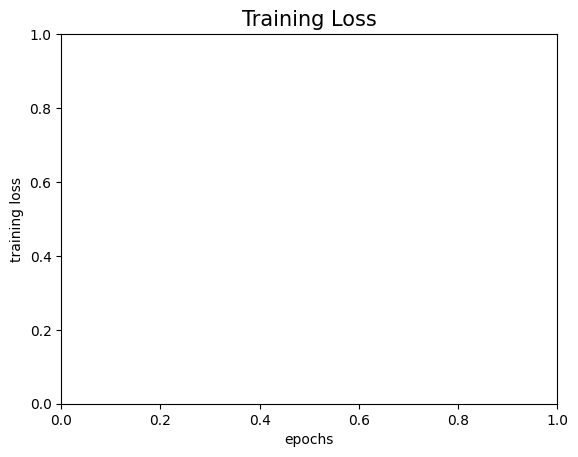

In [ ]:
# # cifar_resnet.py
net = net.to(device)
criterion = nn.CrossEntropyLoss()
PATH = './cifar_net_Adam.pth'
for beta in betas:
    beta_2 = beta
    for batchSize in batchSizes:
        batchsize = batchSize
        #alex change 2
        # net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
        # net = net.to(device)
        optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta), eps=1e-08, weight_decay=0, amsgrad=False)
        #alex change 3
        # trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize,
        #                                   shuffle=True, num_workers=8,  pin_memory=True)

        # testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
        #                                  shuffle=False, num_workers=8,  pin_memory=True)
        train(net, epochs, "Exp1-training-loss-beta1="+str(beta_1)+";beta2="+str(beta)+";bs="+str(batchSize), "Exp1-test-accuracy-beta1="+str(beta_1)+";beta2="+str(beta_2)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";beta2="+str(beta_2)+";bs="+str(batchsize), 0.001, batchsize, device)
        torch.save(net.state_dict(), PATH)
print('Finished Training')

In [ ]:
# cifar_resnet_SGD.py
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=beta_1, dampening=0, weight_decay=0, nesterov=False)
PATH = './cifar_net_SGD.pth'
for batchSize in batchSizes:
    train(net, epochs, "Exp1-training-loss-beta1="+str(beta_1)+";bs="+str(batchSize), "Exp1-test-accuracy-beta1="+str(beta_1)+";bs="+str(batchSize), "Exp1-train-accuracy-beta1="+str(beta_1)+";bs="+str(batchSize), 0.001, batchSize, device)
    torch.save(net.state_dict(), PATH)
print('Finished Training')